# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [7]:
import zipfile

from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# open zip file and get the images
file_name = 'readonly/images.zip'
my_zip = zipfile.ZipFile(file_name, 'r')
pics = [my_zip.open(z) for z in my_zip.infolist()]

# create dictionary to store PIL image, bounding boxes and text
img_dict = {}

# process each image file
for pic in pics:
    
    # create a temp dictionary for image data
    img_data = {}
    
    # load image file and store in dictionary
    img = Image.open(pic)
    img_data['image'] = img
    
    # identify faces and store bounding boxes in dictionary
    gray_img = cv.cvtColor(np.array(img), cv.COLOR_BGR2GRAY) # convert to greyscale
    faces = face_cascade.detectMultiScale(gray_img, 1.3, minNeighbors = 5)
    try:
        img_data['boxes'] = faces.tolist()
    except:
        img_data['boxes'] = None

    # identify text through ocr and store in dictionary
    text = pytesseract.image_to_string(img, lang = 'eng')
    img_data['text'] = text
    
    # store in dictionary
    img_dict[pic.name] = img_data

In [8]:
def get_faces(img, boxes):
    '''
    Takes the passed image and crops out a series of images based on a series of bounding boxes
    passed to the function also.
    
    :param img: A PIL.Image object
    :param boxes: A list of rectangles corresponding to identified faces. Values are the x,y coordinates 
    for leftmost starting point, and width and height of rectangle
    
    :return face_list: list of PIL.Image objects cropped from original image
    '''
    if not boxes:
    
        return None
    
    else:
        
        thumb_size = (110, 110)
        face_list = []

        for box in boxes:
            x, y, w, h = box
            temp_img = img.copy()
            face = temp_img.crop((x, y, x + w, y + h))
            face.thumbnail(thumb_size)
            face_list.append(face)
    
    return face_list

In [9]:
def create_sheet(img, boxes):
    '''
    Create the resulting sheet of faces for image passed to the function
    
    :param img: A PIL.Image object
    :param boxes: A list of rectangles corresponding to identified faces. Values are the x,y coordinates 
    for leftmost starting point, and width and height of rectangle
    
    :return None: Nothing is returned
    
    '''
    
    # call to function get_faces to get the list of face images
    faces = get_faces(img, boxes)
    
    # check if there are any faces
    if not faces:
        
        print('But there were no faces in that file!')
        
    else:
        
        # build dimensions for sheet
        first_image = faces[0]
        my_sheet=Image.new(first_image.mode, (first_image.width*5,first_image.height*2))
        x=0
        y=0

        for item in faces:
            # paste current image into sheet
            my_sheet.paste(item, (x, y) )

            # update X position. If it is going to be the width of the image, then we set it to 0
            # and update Y as well to point to the next "line" of the sheet.
            if x+first_image.width == my_sheet.width:
                x=0
                y=y+first_image.height
            else:
                x=x+first_image.width

        # display the sheet
        display(my_sheet)
        
    return None

In [10]:
def search_for_string(text):
    
    for key in img_dict.keys():
        
        if text in img_dict[key]['text']:
            print('Result found in file {}'.format(key))
            create_sheet(img_dict[key]['image'], img_dict[key]['boxes'])

Result found in file a-0.png


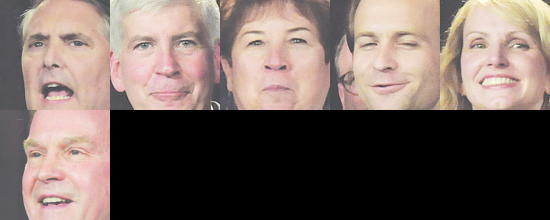

Result found in file a-3.png


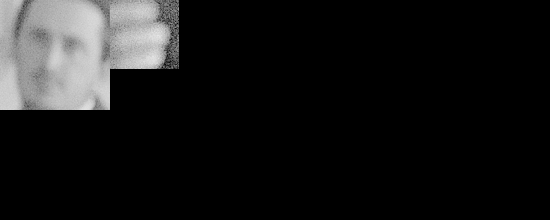

In [12]:
search_for_string('Christopher')

Result found in file a-0.png


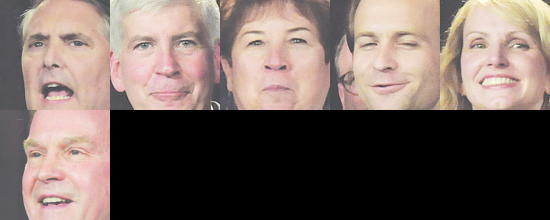

Result found in file a-1.png


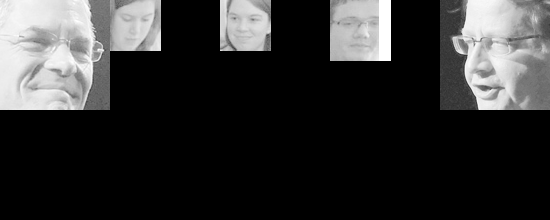

Result found in file a-10.png
But there were no faces in that file!
Result found in file a-13.png


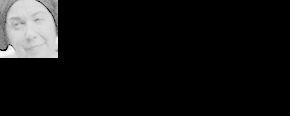

Result found in file a-2.png


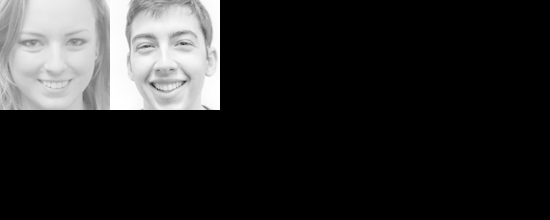

Result found in file a-3.png


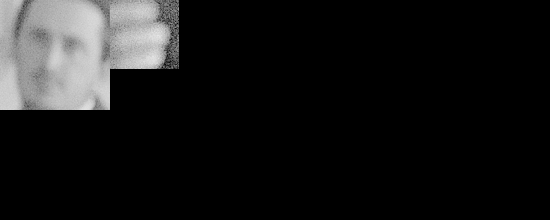

Result found in file a-8.png
But there were no faces in that file!


In [13]:
search_for_string('Mark')